# Zoom on GRIN window before analysis

When recording with miniscope, you may end up having a lot of 'dead space' due to GRIN lens size. This dead space can actually impact things like motion correction and CNMFE because it is pixel-based analysis.

I've run CNMFE for over 70min because of this on a 2.9gb file and 10CPU cores. Far too long.
___

Define your fname (session with recording), then run the code below

In [15]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import os

# define movie paths
fname = r'/Users/js0403/miniscope/PFC-Astrocytes/122A/AAV2/3-gfaABC1D-GCaMP8f/2024_02_06/11_59_46/miniscopeDeviceName/full_movie.tif'
root_dir = os.path.split(fname)[0]

# read movie
movie_tiff = tifffile.imread(fname)

#### Visualize dataset and adjust `idx_row` and `idx_col` to trim your x and y data to remove circular deadspace

In [16]:
root_dir

'/Users/js0403/miniscope/PFC-Astrocytes/122A/AAV2/3-gfaABC1D-GCaMP8f/2024_02_06/11_59_46/miniscopeDeviceName'

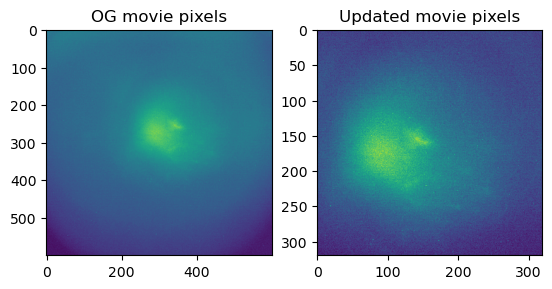

In [17]:
# CHANGE ME - this works nicely!
idx_row = [100,420] # change me
idx_col = [200,520] # change me

# plot results
plt.subplot(1,2,1)
plt.imshow(movie_tiff[1000,:,:])
plt.title("OG movie pixels")

plt.subplot(1,2,2)
plt.imshow(movie_tiff[1000,idx_row[0]:idx_row[1], idx_col[0]:idx_col[1]])
plt.title("Updated movie pixels")
plt.savefig(os.path.join(root_dir,'pixel_zoom'))

# Save data

In [6]:
if '.tif' in fname:
    filename = fname.split('.tif')
elif '.avi' in fname:
    filename = fname.split('.avi')
filename[0]

'/Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2024_01_23/14_04_52/miniscopeDeviceName/full_movie'

In [7]:
# SAVE DATA
new_movie = movie_tiff[:,idx_row[0]:idx_row[1], idx_col[0]:idx_col[1]]
if '.tif' in fname:
    filename = fname.split('.tif')[0]
elif '.avi' in fname:
    filename = fname.split('.avi')[0]
print("Writing file: ",filename+'_mod.tif')
tifffile.imwrite(filename+'_mod.tif', new_movie)


Writing file:  /Users/js0403/miniscope/data/134A/AAV2/3-Syn-GCaMP8f/2024_01_23/14_04_52/miniscopeDeviceName/full_movie_mod.tif


# Now downsample your data spatially

Sometimes, if you are running into problems with CNMFE, you have to downsample your data. Here gives you the option to do so

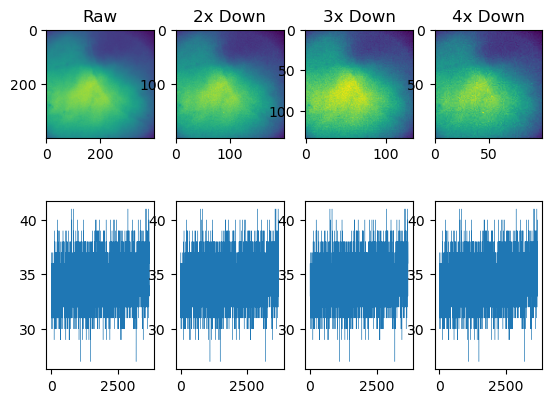

In [8]:
movie_2x = new_movie[:,::2,::2]
movie_3x = new_movie[:,::3,::3]
movie_4x = new_movie[:,::4,::4]

plt.subplot(2,4,1)
plt.imshow(new_movie[0,:,:])
plt.title("Raw")
plt.subplot(2,4,2)
plt.imshow(movie_2x[0,:,:])
plt.title("2x Down")
plt.subplot(2,4,3)
plt.imshow(movie_3x[0,:,:])
plt.title("3x Down")
plt.subplot(2,4,4)
plt.imshow(movie_4x[0,:,:])
plt.title("4x Down")

plt.subplot(2,4,5)
plt.plot(new_movie[:,0,0],linewidth=0.25)
plt.subplot(2,4,6)
plt.plot(movie_2x[:,0,0],linewidth=0.25)
plt.subplot(2,4,7)
plt.plot(movie_3x[:,0,0],linewidth=0.25)
plt.subplot(2,4,8)
plt.plot(movie_4x[:,0,0],linewidth=0.25)

plt.savefig(filename+'downsampleOptions.eps',format='eps')

## If you want to downsample your data, choose to do so by selecting below

# NOTE THAT YOU DO NOT HAVE TO DO THIS!

In [9]:
downsample = 2 # select this based on the video above!!
movie_down = new_movie[:,::2,::2]
save_name = filename+'_mod_downx'+str(downsample)+'.tif'
tifffile.imwrite(save_name, movie_down)